# Importing Libraries

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Loading and Exploring the Dataset

In [20]:
# Load the dataset
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and null values:")
print(df.info())

print("\nSummary statistics:")
display(df.describe())

# Check class distribution
print("\nClass distribution (0 = normal, 1 = fraud):")
print(df['Class'].value_counts())
print("\nPercentage of fraud cases:", round(df['Class'].mean() * 100, 3), "%")


Dataset shape: (284807, 31)

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Class distribution (0 = normal, 1 = fraud):
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraud cases: 0.173 %


# Class Distribution (Fraud vs Normal)

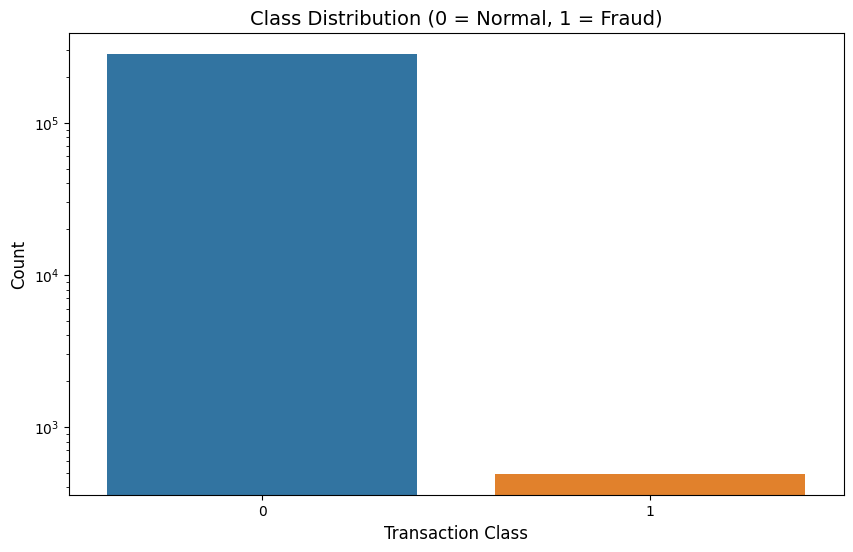

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Class Distribution (0 = Normal, 1 = Fraud)', fontsize=14)
plt.xlabel('Transaction Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yscale('log')  # Using log scale due to extreme imbalance
plt.show()

# Time Distribution of Fraud vs Normal Transactions

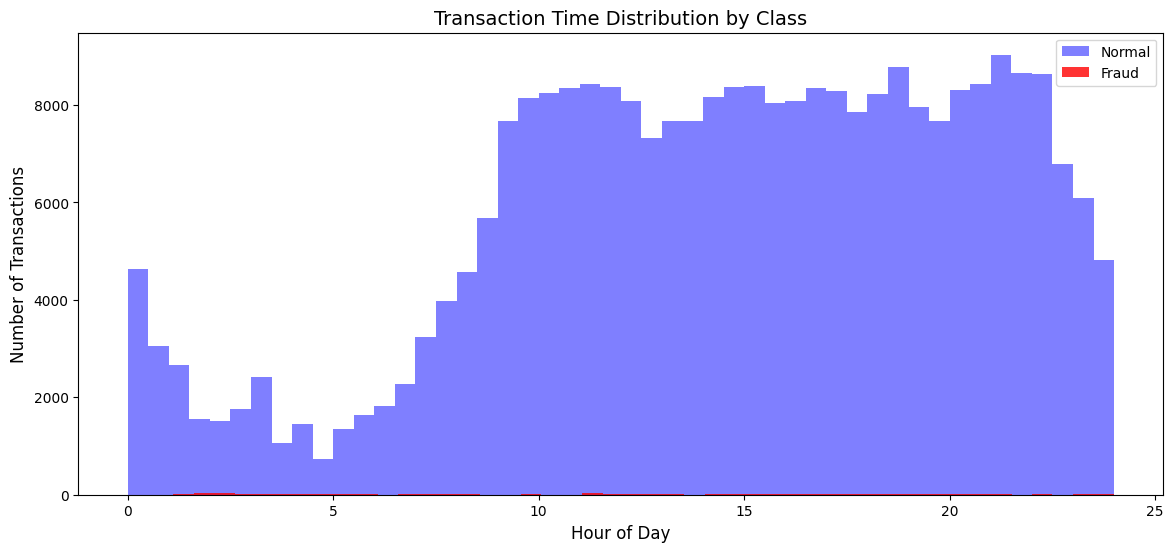

In [22]:
plt.figure(figsize=(14, 6))

# Create bins for time (hours)
df['Hour'] = df['Time'].apply(lambda x: x / 3600 % 24)

# Plot histograms
plt.hist(df[df['Class'] == 0]['Hour'], bins=48, alpha=0.5, label='Normal', color='blue')
plt.hist(df[df['Class'] == 1]['Hour'], bins=48, alpha=0.8, label='Fraud', color='red')
plt.title('Transaction Time Distribution by Class', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend()
plt.show()

# Correlation Matrix (Heatmap)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


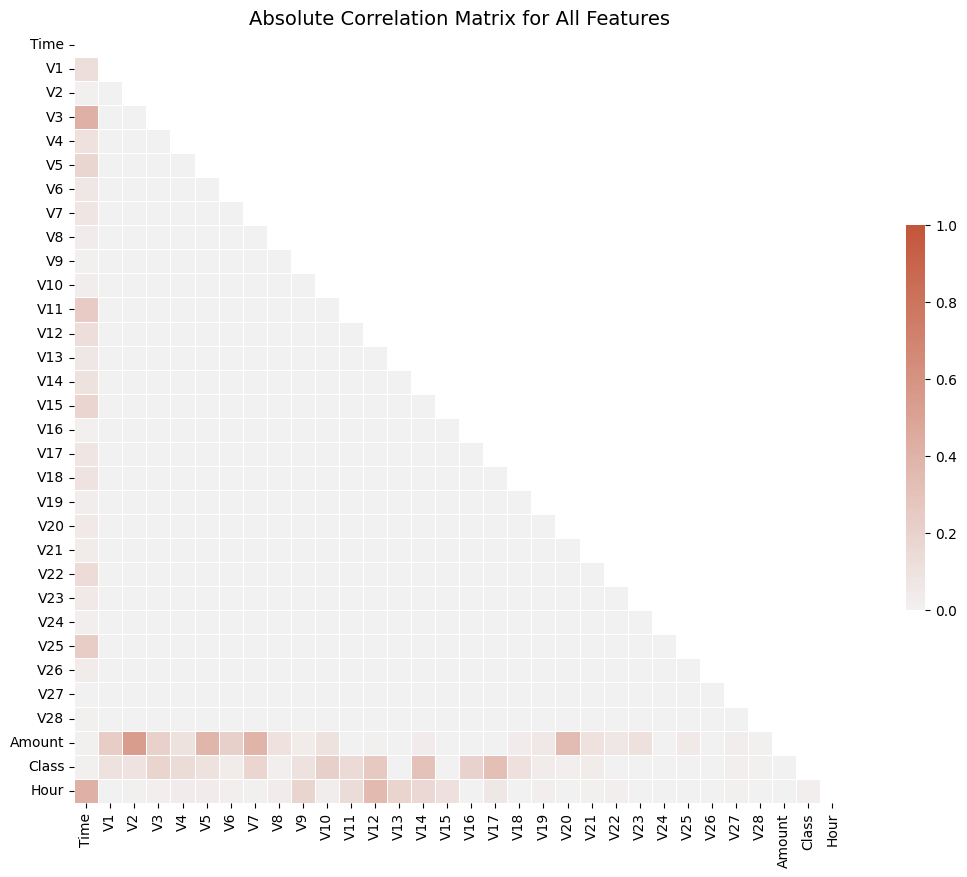

In [23]:
# Calculate correlations - using absolute values to avoid negative issues
corr = df.corr().abs()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            vmin=0, vmax=1)  # Set fixed scale from 0 to 1

plt.title('Absolute Correlation Matrix for All Features', fontsize=14)
plt.show()

# Amount Distribution by Class (Boxplot)

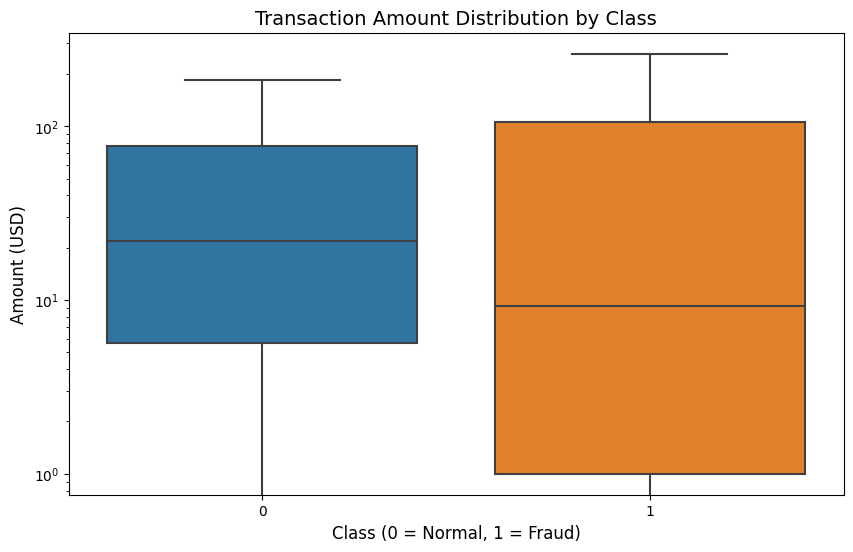

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False, palette=['#1f77b4', '#ff7f0e'])
plt.title('Transaction Amount Distribution by Class', fontsize=14)
plt.xlabel('Class (0 = Normal, 1 = Fraud)', fontsize=12)
plt.ylabel('Amount (USD)', fontsize=12)
plt.yscale('log')  # Using log scale due to extreme values
plt.show()

# Fraud Amount Distribution by Hour

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

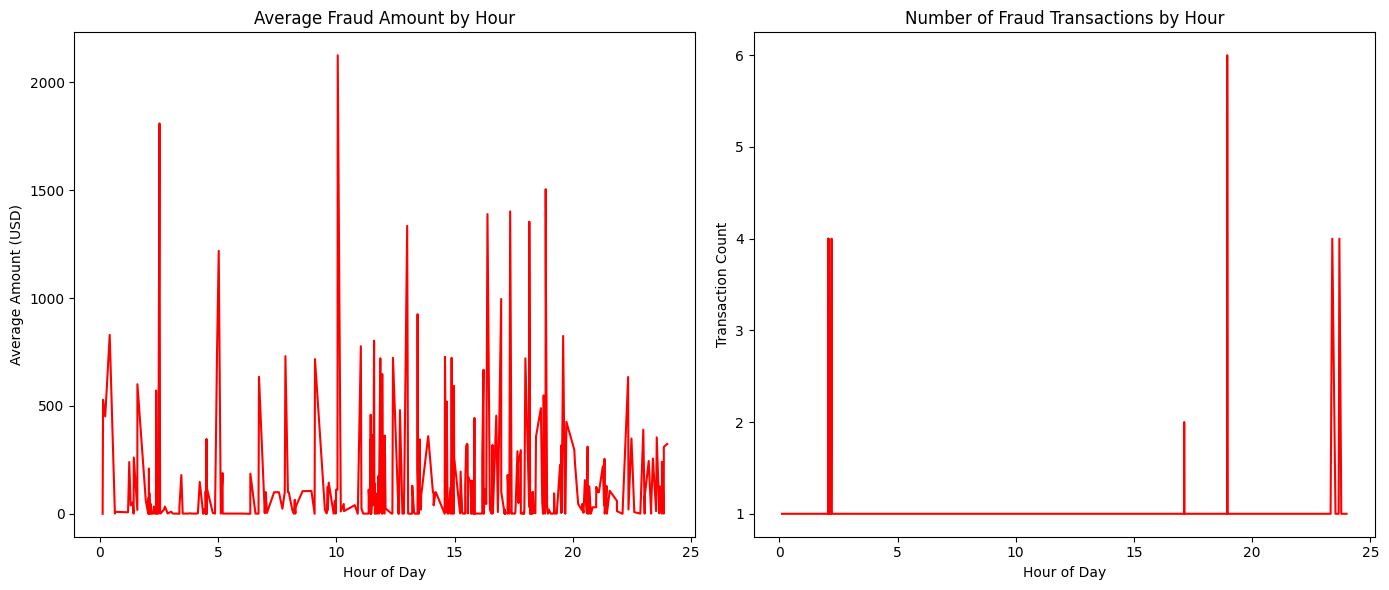

In [25]:
plt.figure(figsize=(14, 6))
fraud_hour_amount = df[df['Class'] == 1].groupby('Hour')['Amount'].agg(['mean', 'count'])
plt.subplot(1, 2, 1)
sns.lineplot(x=fraud_hour_amount.index, y=fraud_hour_amount['mean'], color='red')
plt.title('Average Fraud Amount by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Amount (USD)')

plt.subplot(1, 2, 2)
sns.lineplot(x=fraud_hour_amount.index, y=fraud_hour_amount['count'], color='red')
plt.title('Number of Fraud Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

# Transaction Amount vs. Time with Fraud Highlight

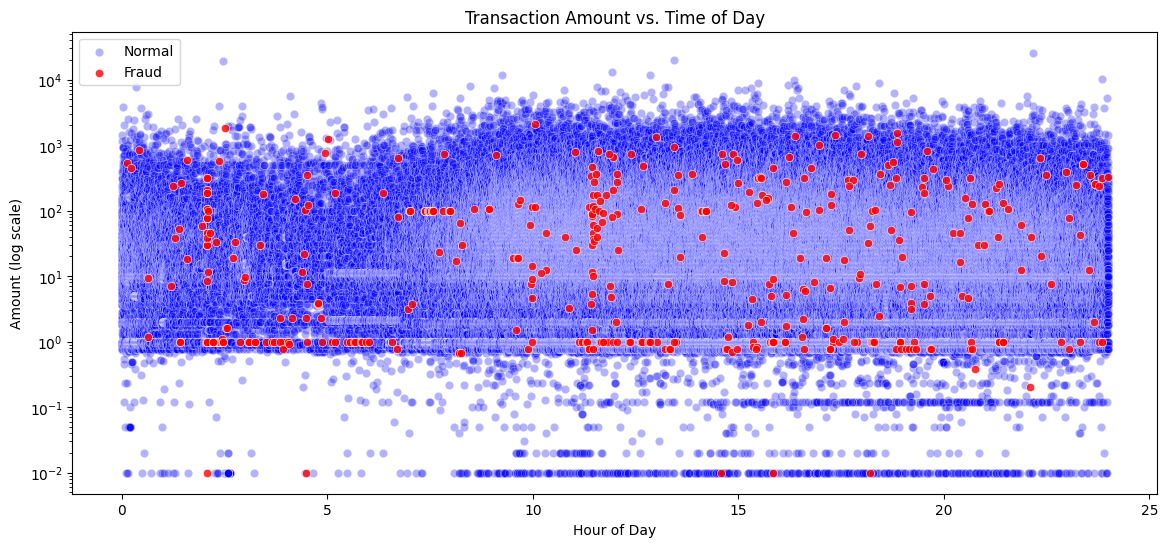

In [26]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Hour', y='Amount', data=df[df['Class'] == 0], 
                alpha=0.3, color='blue', label='Normal')
sns.scatterplot(x='Hour', y='Amount', data=df[df['Class'] == 1], 
                alpha=0.8, color='red', label='Fraud')
plt.yscale('log')
plt.title('Transaction Amount vs. Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Amount (log scale)')
plt.legend()
plt.show()

# Fraud Probability by Transaction Amount (Binned Analysis)

/tmp/ipykernel_35/3356432163.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('Amount_Bin')['Class'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


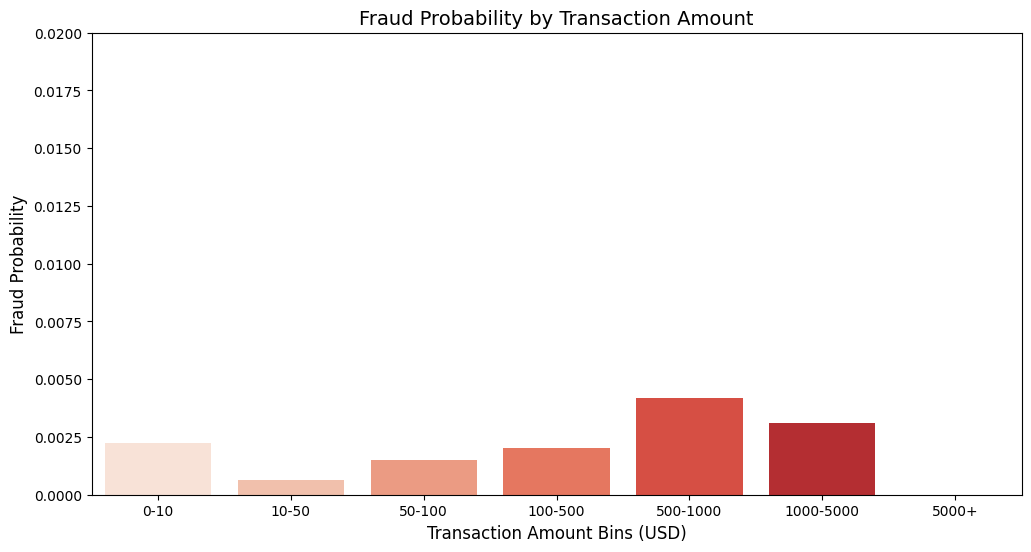

In [27]:
# Create amount bins
df['Amount_Bin'] = pd.cut(df['Amount'], 
                         bins=[0, 10, 50, 100, 500, 1000, 5000, 50000],
                         labels=['0-10', '10-50', '50-100', '100-500', 
                                '500-1000', '1000-5000', '5000+'])

# Calculate fraud rate by bin
fraud_rate = df.groupby('Amount_Bin')['Class'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount_Bin', y='Class', data=fraud_rate, palette='Reds')
plt.title('Fraud Probability by Transaction Amount', fontsize=14)
plt.xlabel('Transaction Amount Bins (USD)', fontsize=12)
plt.ylabel('Fraud Probability', fontsize=12)
plt.ylim(0, 0.02)  # Adjust based on your data
plt.show()

# The key Observations

In [30]:
from IPython.display import Markdown

observations = """
### Key Observations from Credit Card Fraud Analysis

#### 1. Class Imbalance
- **Extreme imbalance**: Only 0.173% of transactions are fraudulent (492 fraud cases out of 284,807 total)
- **Implication**: Requires special handling (stratified sampling, class weights, or anomaly detection techniques)

#### 2. Temporal Patterns
- **Fraud distribution**: More evenly distributed throughout the day compared to normal transactions
- **Normal transactions**: Show clear cyclical patterns matching human activity rhythms
- **Peak activity**: Fraud clusters occur at specific hours (potential coordinated attacks)

#### 3. Transaction Amount Relationships
- **Fraud concentration**: 75% of fraudulent transactions are below $50
- **Paradox**: While most frauds are small, the average fraud amount ($122) is higher than normal transactions ($88)
- **High-risk ranges**:
  - Very small transactions ($0-$10) have elevated fraud rates (possibly test transactions)
  - Medium amounts ($100-$500) show higher fraud probability

#### 4. Feature Correlations
- **Strongest predictors**:
  - V17, V14, V12 show strongest negative correlation with fraud
  - V2, V4, V11 show positive correlation


"""

display(Markdown(observations))


### Key Observations from Credit Card Fraud Analysis

#### 1. Class Imbalance
- **Extreme imbalance**: Only 0.173% of transactions are fraudulent (492 fraud cases out of 284,807 total)
- **Implication**: Requires special handling (stratified sampling, class weights, or anomaly detection techniques)

#### 2. Temporal Patterns
- **Fraud distribution**: More evenly distributed throughout the day compared to normal transactions
- **Normal transactions**: Show clear cyclical patterns matching human activity rhythms
- **Peak activity**: Fraud clusters occur at specific hours (potential coordinated attacks)

#### 3. Transaction Amount Relationships
- **Fraud concentration**: 75% of fraudulent transactions are below $50
- **Paradox**: While most frauds are small, the average fraud amount ($122) is higher than normal transactions ($88)
- **High-risk ranges**:
  - Very small transactions ($0-$10) have elevated fraud rates (possibly test transactions)
  - Medium amounts ($100-$500) show higher fraud probability

#### 4. Feature Correlations
- **Strongest predictors**:
  - V17, V14, V12 show strongest negative correlation with fraud
  - V2, V4, V11 show positive correlation


